# 7. Overfitting Prevention

## Why do we need to solve overfitting? 
- To increase the generalization ability of our deep learning algorithms
- Able to make predictions well for out-of-sample data 

## Overfitting and Underfitting: Examples

![](./images/overfitting.png)
- **_This is an example from scikit-learn's website where you can easily (but shouldn't waste time) recreate via matplotlib :)_**

#### Degree 1: underfitting
- Insufficiently fits data
    - High training loss
- Unable to represent the true function
    - Bad generalization ability
    - Low testing accuracy
        
#### Degree 4: "goodfitting"
- Sufficiently fits data
    - Low training loss
- Able to represent the true function
    - Good generalization ability
    - High testing accuracy
    
#### Degree 15: overfitting
- Overfits data
    - Very low to zero training loss
- Unable to represent the true function
    - Bad generalization ability
    - Low testing accuracy

## Overfitting and Underfitting: Learning Curves
- Separate training/testing datasets
- Understand generalization ability through the learning curve
![](./images/overfitting_2.png)

#### Underfitting: High Bias
- Training/testing errors converged at a high level
    - More data does not help
    - Model has insufficient representational capacity $\rightarrow$ unable to represent underlying function
        - Poor data fit (high training error)
        - Poor generalization (high testing error)
- Solution
    - Increase model's complexity/capacity
        - More layers
        - Larger hidden states
    
#### Overfitting: High Variance
- Training/testing errors converged with a large gap between
     - Excessive data fit (almost 0 training error)
     - Poor generalization (high testing error)
- Solutions
    - Decrease model complexity
    - More data
    
#### Goodfitting
- Training/testing errors converged with very small gap at a low error level
    - Good data fit (low training error; not excessively low)
    - Good generalization (low testing error)

## Solving Overfitting
- Data augmentation (more data)    
- Early stopping
- Regularization: any changes to the learning algorithm to reduce testing error, not training error
    - Weight decay (L2 regularization)
    - Dropout    
    - Batch Normalization

## Overfitting Solution 1: Data Augmentation
- Expanding the existing dataset, MNIST (28x28 images)
- Works for most if not all image datasets (CIFAR-10, CIFAR-100, SVHN, etc.)

### Centre Crop: 28 pixels

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)


'''
STEP 0: CREATE TRANSFORMATIONS
'''

transform = transforms.Compose([
            transforms.CenterCrop(28),
            transforms.ToTensor(),
            ])


'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            #transform=transforms.ToTensor(),
                            transform=transform,
                            download=True)

train_dataset_orig = dsets.MNIST(root='./data', 
                                 train=True, 
                                 transform=transforms.ToTensor(),
                                 download=True)

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)


train_loader_orig = torch.utils.data.DataLoader(dataset=train_dataset_orig, 
                                                    batch_size=batch_size, 
                                                    shuffle=True)

Processing...
Done!


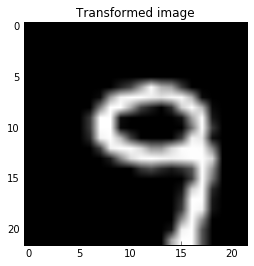

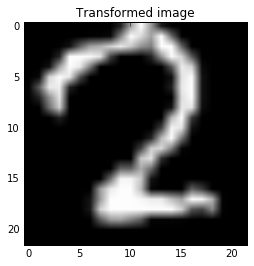

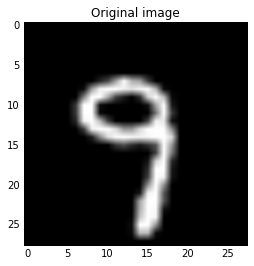

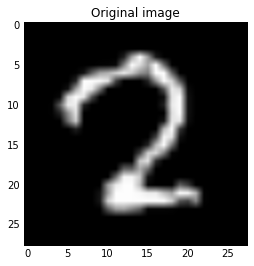

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

for i, (images, labels) in enumerate(train_loader):
    torch.manual_seed(0)
    # Transformed image
    plt.imshow(images.numpy()[i][0], cmap='gray')
    plt.title('Transformed image')
    plt.show()
    
    if i == 1:
        break
        
for i, (images, labels) in enumerate(train_loader_orig):
    torch.manual_seed(0)
    # Transformed image
    plt.imshow(images.numpy()[i][0], cmap='gray')
    plt.title('Original image')
    plt.show()
    
    if i == 1:
        break

### Centre Crop: 22 pixels

In [48]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)


'''
STEP 0: CREATE TRANSFORMATIONS
'''

transform = transforms.Compose([
            transforms.CenterCrop(22),
            transforms.ToTensor(),
            ])


'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            #transform=transforms.ToTensor(),
                            transform=transform,
                            download=True)

train_dataset_orig = dsets.MNIST(root='./data', 
                                 train=True, 
                                 transform=transforms.ToTensor(),
                                 download=True)

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)


train_loader_orig = torch.utils.data.DataLoader(dataset=train_dataset_orig, 
                                                    batch_size=batch_size, 
                                                    shuffle=True)

Files already downloaded
Files already downloaded


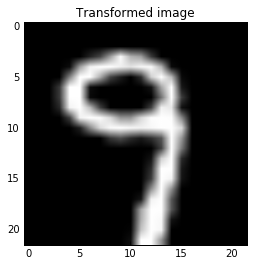

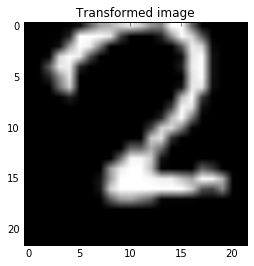

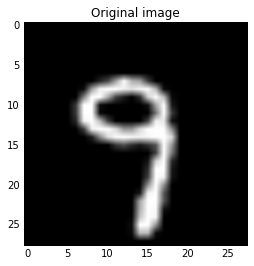

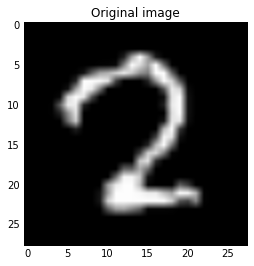

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

for i, (images, labels) in enumerate(train_loader):
    torch.manual_seed(0)
    # Transformed image
    plt.imshow(images.numpy()[i][0], cmap='gray')
    plt.title('Transformed image')
    plt.show()
    
    if i == 1:
        break
        
for i, (images, labels) in enumerate(train_loader_orig):
    torch.manual_seed(0)
    # Transformed image
    plt.imshow(images.numpy()[i][0], cmap='gray')
    plt.title('Original image')
    plt.show()
    
    if i == 1:
        break

### Random Crop: 22 pixels

In [51]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)


'''
STEP 0: CREATE TRANSFORMATIONS
'''

transform = transforms.Compose([
            transforms.RandomCrop(22),
            transforms.ToTensor(),
            ])


'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            #transform=transforms.ToTensor(),
                            transform=transform,
                            download=True)

train_dataset_orig = dsets.MNIST(root='./data', 
                                 train=True, 
                                 transform=transforms.ToTensor(),
                                 download=True)

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)


train_loader_orig = torch.utils.data.DataLoader(dataset=train_dataset_orig, 
                                                    batch_size=batch_size, 
                                                    shuffle=True)

Files already downloaded
Files already downloaded


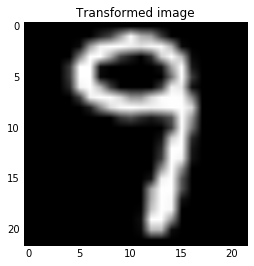

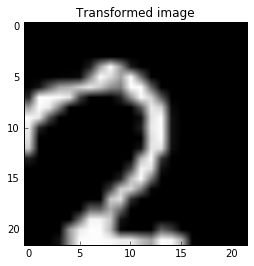

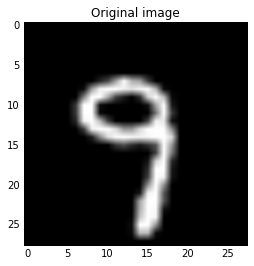

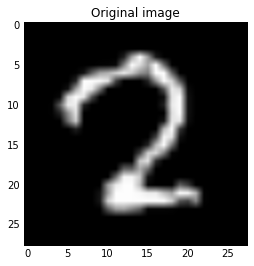

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

for i, (images, labels) in enumerate(train_loader):
    torch.manual_seed(0)
    # Transformed image
    plt.imshow(images.numpy()[i][0], cmap='gray')
    plt.title('Transformed image')
    plt.show()
    
    if i == 1:
        break
        
for i, (images, labels) in enumerate(train_loader_orig):
    torch.manual_seed(0)
    # Transformed image
    plt.imshow(images.numpy()[i][0], cmap='gray')
    plt.title('Original image')
    plt.show()
    
    if i == 1:
        break

### Random Horizontal Flip: p=0.5

In [64]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)


'''
STEP 0: CREATE TRANSFORMATIONS
'''

transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            ])


'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            #transform=transforms.ToTensor(),
                            transform=transform,
                            download=True)

train_dataset_orig = dsets.MNIST(root='./data', 
                                 train=True, 
                                 transform=transforms.ToTensor(),
                                 download=True)

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)


train_loader_orig = torch.utils.data.DataLoader(dataset=train_dataset_orig, 
                                                    batch_size=batch_size, 
                                                    shuffle=True)

Files already downloaded
Files already downloaded


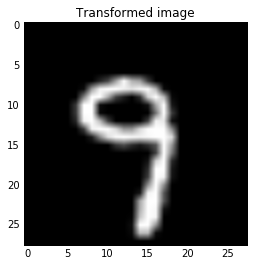

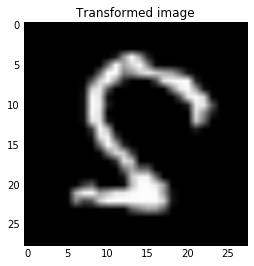

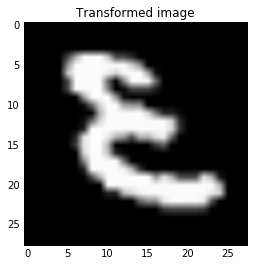

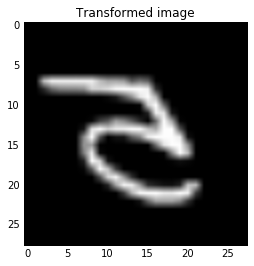

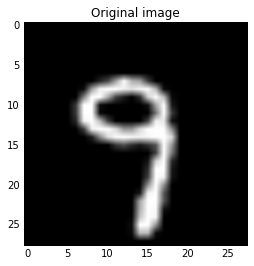

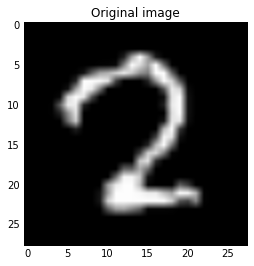

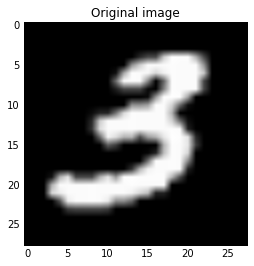

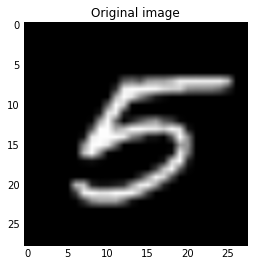

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

for i, (images, labels) in enumerate(train_loader):
    torch.manual_seed(0)
    # Transformed image
    plt.imshow(images.numpy()[i][0], cmap='gray')
    plt.title('Transformed image')
    plt.show()
    
    if i == 3:
        break
        
for i, (images, labels) in enumerate(train_loader_orig):
    torch.manual_seed(0)
    # Transformed image
    plt.imshow(images.numpy()[i][0], cmap='gray')
    plt.title('Original image')
    plt.show()
    
    if i == 3:
        break

### Normalization
- Not augmentation, but required for our initializations to have constant variance (Xavier/He)
    - We assumed inputs/weights drawn i.i.d. with Gaussian distribution of mean=0
- We can normalize by calculating the mean and standard deviation of each channel
    - MNIST only 1 channel, black
    - 1 mean, 1 standard deviation
- Once we've the mean/std $\rightarrow$ normalize our images to have zero mean
    - $X = \frac{X - mean}{std}$
    - X: 28 by 28 pixels (1 channel, grayscale)

In [74]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)


'''
STEP 0: CREATE TRANSFORMATIONS
'''

transform = transforms.Compose([
            transforms.ToTensor(),
            # Normalization always after ToTensor and all transformations
            transforms.Normalize((0.1307,), (0.3081,)),
            ])


'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            #transform=transforms.ToTensor(),
                            transform=transform,
                            download=True)

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)


Files already downloaded


#### How did we get the mean/std?
- mean=0.1307
- std=0.3081

In [231]:
print(list(train_dataset.train_data.size()))

[60000L, 28L, 28L]


In [233]:
print(train_dataset.train_data.float().mean()/255)

0.130660476274


In [234]:
print(train_dataset.train_data.float().std()/255)

0.308107807179


#### Why divide by 255?
- 784 inputs: each pixel 28x28
- Each pixel value: 0-255 (single grayscale)
- Divide by 255 to have any single pixel value to be within [0,1] $\rightarrow$simple rescaling

### Putting everything together

In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR

'''
STEP 0: CREATE TRANSFORMATIONS
'''
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

mean_mnist = train_dataset.train_data.float().mean()/255
std_mnist = train_dataset.train_data.float().std()/255

transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((mean_mnist,), (std_mnist,)),
            ])


'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            #transform=transforms.ToTensor(),
                            transform=transform,
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           #transform=transforms.ToTensor(),
                           transform=transform)

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 128
n_iters = 10000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Linear weight, W,  Y = WX + B
        nn.init.kaiming_normal(self.fc1.weight)
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
        nn.init.kaiming_normal(self.fc2.weight)
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
    
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

# Enable GPU acceleration
model.cuda()

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

'''
STEP 7: INSTANTIATE STEP LEARNING SCHEDULER CLASS
'''
# step_size: at how many multiples of epoch you decay
# step_size = 1, after every 2 epoch, new_lr = lr*gamma 
# step_size = 2, after every 2 epoch, new_lr = lr*gamma 

# gamma = decaying factor
scheduler = StepLR(optimizer, step_size=1, gamma=0.96)

'''
STEP 8: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    # Decay Learning Rate
    scheduler.step()
    # Print Learning Rate
    print('Epoch:', epoch,'LR:', scheduler.get_lr())
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images.view(-1, 28*28).cuda())
        labels = Variable(labels.cuda())
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = Variable(images.view(-1, 28*28).cuda())
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted.cpu() == labels.cpu()).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Epoch: 0 LR: [0.1]
Epoch: 1 LR: [0.096]
Iteration: 500. Loss: 0.24197177588939667. Accuracy: 92.41
Epoch: 2 LR: [0.09216]
Iteration: 1000. Loss: 0.13449203968048096. Accuracy: 94.0
Epoch: 3 LR: [0.08847359999999999]
Iteration: 1500. Loss: 0.08937471359968185. Accuracy: 94.54
Epoch: 4 LR: [0.084934656]
Iteration: 2000. Loss: 0.06348138302564621. Accuracy: 94.51
Epoch: 5 LR: [0.08153726975999999]
Iteration: 2500. Loss: 0.0968589037656784. Accuracy: 94.83
Epoch: 6 LR: [0.07827577896959999]
Iteration: 3000. Loss: 0.13235974311828613. Accuracy: 95.1
Epoch: 7 LR: [0.07514474781081598]
Iteration: 3500. Loss: 0.044602278620004654. Accuracy: 95.29
Epoch: 8 LR: [0.07213895789838334]
Iteration: 4000. Loss: 0.1271107792854309. Accuracy: 95.6
Epoch: 9 LR: [0.06925339958244801]
Iteration: 4500. Loss: 0.047023046761751175. Accuracy: 95.4
Epoch: 10 LR: [0.06648326359915008]
Iteration: 5000. Loss: 0.10801819711923599. Accuracy: 95.67
Epoch: 11 LR: [0.06382393305518408]
Iteration: 5500. Loss: 0.06465288

## Overfitting Solution 2: Early Stopping
![](./images/early_stopping.png)

### How do we do this via PyTorch? 3 Steps.
1. Track validation accuracy
2. Whenever validation accuracy is better, we save the model's parameters
3. Load the model's best parameters to test

In [10]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
# New import for creating directories in your folder
import os

# Set seed
torch.manual_seed(0)

# Scheduler import
from torch.optim.lr_scheduler import StepLR

'''
CHECK LOG OR MAKE LOG DIRECTORY
'''
# This will create a directory if there isn't one to store models
if not os.path.isdir('logs'):
    os.mkdir('logs')
    
'''
STEP 0: CREATE TRANSFORMATIONS
'''
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

mean_mnist = train_dataset.train_data.float().mean()/255
std_mnist = train_dataset.train_data.float().std()/255

transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((mean_mnist,), (std_mnist,)),
            ])


'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            #transform=transforms.ToTensor(),
                            transform=transform,
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           #transform=transforms.ToTensor(),
                           transform=transform)

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 128
n_iters = 10000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Linear weight, W,  Y = WX + B
        nn.init.kaiming_normal(self.fc1.weight)
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
        nn.init.kaiming_normal(self.fc2.weight)
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
    
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

# Enable GPU acceleration
model.cuda()

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

'''
STEP 7: INSTANTIATE STEP LEARNING SCHEDULER CLASS
'''
# step_size: at how many multiples of epoch you decay
# step_size = 1, after every 2 epoch, new_lr = lr*gamma 
# step_size = 2, after every 2 epoch, new_lr = lr*gamma 

# gamma = decaying factor
scheduler = StepLR(optimizer, step_size=1, gamma=0.96)

'''
STEP 8: TRAIN THE MODEL
'''
iter = 0

# Validation accuracy tracker
val_acc = 0

for epoch in range(num_epochs):
    # Decay Learning Rate
    scheduler.step()
    # Print Learning Rate
    print('Epoch:', epoch,'LR:', scheduler.get_lr())
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images.view(-1, 28*28).cuda())
        labels = Variable(labels.cuda())
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
    # Calculate Accuracy at every epoch         
    correct = 0
    total = 0
    # Iterate through test dataset
    for images, labels in test_loader:
        # Load images to a Torch Variable
        images = Variable(images.view(-1, 28*28).cuda())

        # Forward pass only to get logits/output
        outputs = model(images)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)

        # Total number of labels
        total += labels.size(0)

        # Total correct predictions
        correct += (predicted.cpu() == labels.cpu()).sum()

    accuracy = 100 * correct / total
    
    # if epoch 0, best accuracy is this

    if epoch == 0:
        val_acc = accuracy
    elif accuracy > val_acc:
        val_acc = accuracy
        # Save your model
        torch.save(model.state_dict(), './logs/best_model.pt')
    # Print Loss
    print('Iteration: {}. Loss: {}. Accuracy: {}. Best Accuracy: {}'.format(iter, loss.data[0], accuracy, val_acc))

Epoch: 0 LR: [0.1]
Iteration: 469. Loss: 0.3540896475315094. Accuracy: 92.21. Best Accuracy: 92.21
Epoch: 1 LR: [0.096]
Iteration: 938. Loss: 0.20400001108646393. Accuracy: 93.58. Best Accuracy: 93.58
Epoch: 2 LR: [0.09216]
Iteration: 1407. Loss: 0.3030942380428314. Accuracy: 93.53. Best Accuracy: 93.58
Epoch: 3 LR: [0.08847359999999999]
Iteration: 1876. Loss: 0.25791990756988525. Accuracy: 94.69. Best Accuracy: 94.69
Epoch: 4 LR: [0.084934656]
Iteration: 2345. Loss: 0.19972562789916992. Accuracy: 94.26. Best Accuracy: 94.69
Epoch: 5 LR: [0.08153726975999999]
Iteration: 2814. Loss: 0.06250293552875519. Accuracy: 94.86. Best Accuracy: 94.86
Epoch: 6 LR: [0.07827577896959999]
Iteration: 3283. Loss: 0.05569496378302574. Accuracy: 95.29. Best Accuracy: 95.29
Epoch: 7 LR: [0.07514474781081598]
Iteration: 3752. Loss: 0.06964835524559021. Accuracy: 95.05. Best Accuracy: 95.29
Epoch: 8 LR: [0.07213895789838334]
Iteration: 4221. Loss: 0.07082325965166092. Accuracy: 95.03. Best Accuracy: 95.29
E

In [13]:
'''
STEP 9: TEST THE MODEL
This model should produce the exact same best test accuracy!
96.11%
'''

# Load the model
model.load_state_dict(torch.load('./logs/best_model.pt'))

# Evaluate model
model.eval()

# Calculate Accuracy at every epoch         
correct = 0
total = 0

# Iterate through test dataset
for images, labels in test_loader:
    # Load images to a Torch Variable
    images = Variable(images.view(-1, 28*28).cuda())

    # Forward pass only to get logits/output
    outputs = model(images)

    # Get predictions from the maximum value
    _, predicted = torch.max(outputs.data, 1)

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted.cpu() == labels.cpu()).sum()

accuracy = 100 * correct / total

# Print Loss
print('Iteration: {}. Loss: {}. Accuracy: {}. Best Accuracy: {}'.format(iter, loss.data[0], accuracy, val_acc))

Iteration: 9849. Loss: 0.06131374463438988. Accuracy: 96.06. Best Accuracy: 96.11


## Overfitting Solution 3: Regularization

## Overfitting Solution 3a: Weight Decay (L2 Regularization)

## Overfitting Solution 3b: Dropout

## Overfitting Solution 4: Batch Normalization